## <p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Churn Binary Classification Model</p>


<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LIST OF CONTENTS</p>   

    
* [1. Import Libraries](#1)
    
* [2. Loading the Data](#2)
    
* [3. Exploratory Data Analysis](#3)
    
* [4. Data Processing](#4)
    
* [5. Churn Prediction Model](#5)
    
* [6. Conclusions](#6)
    
* [7. Recommendations](#7)

<a id="1"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORT LIBRARIES</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Sklearn Modules

In [2]:
# Classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

seed = 123

<a id="2"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING THE DATA</p>

In [36]:
telco_raw = pd.read_csv('telco.csv')
telco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
telco_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<a id="3"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

In [38]:
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation:**

> It seems that there are not null values.


In [39]:
telco_raw['TotalCharges'] = telco_raw['TotalCharges'].str.strip(" ")
telco_raw['TotalCharges'] = pd.to_numeric(telco_raw['TotalCharges'])

In [40]:
# Print the number of unique values in each telco_raw column
telco_raw.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

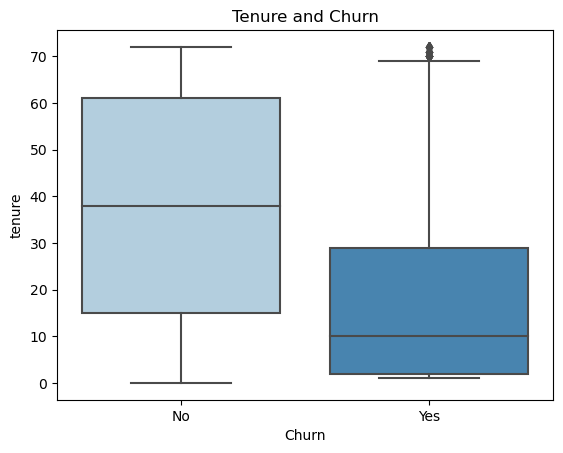

In [73]:
sns.boxplot(x="Churn", y="tenure", data=telco_raw, palette='Blues')
plt.title('Tenure and Churn')
plt.show()

**Observation:**

> Note that generally Churners have less value in `tenure` variable.

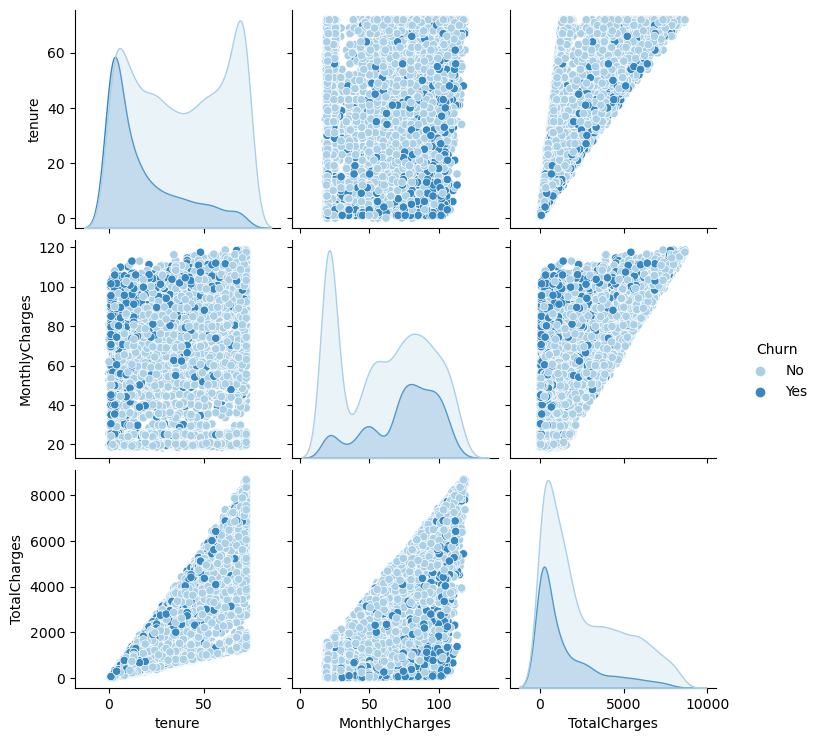

In [52]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(telco_raw[num_col], hue = 'Churn', palette='Blues', diag_kind='kde')
plt.show()

In [53]:
telco_raw[num_col].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


**Observation:**

> Note that `TotalCharges` variable is left skewed.

> `TotalCharges` has a strong positive correlation with `tenure`.

> Churners tend to have Low values in `TotalCharges`, High values in `MonthlyCharges`, and Low values in `tenure`.

In [63]:
# Store categorical column names
categorical = telco_raw.nunique()[telco_raw.nunique() < 5].keys().tolist()
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

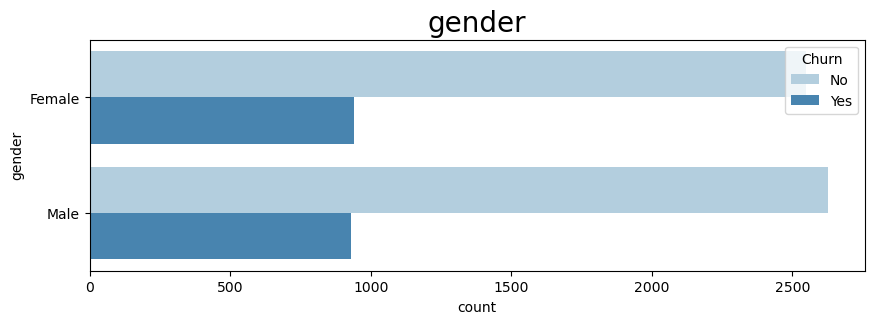

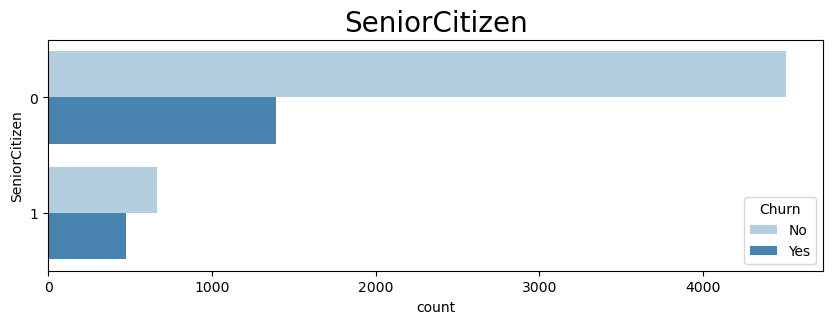

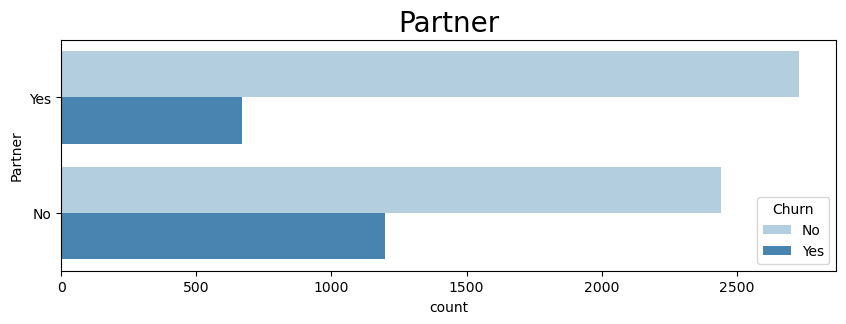

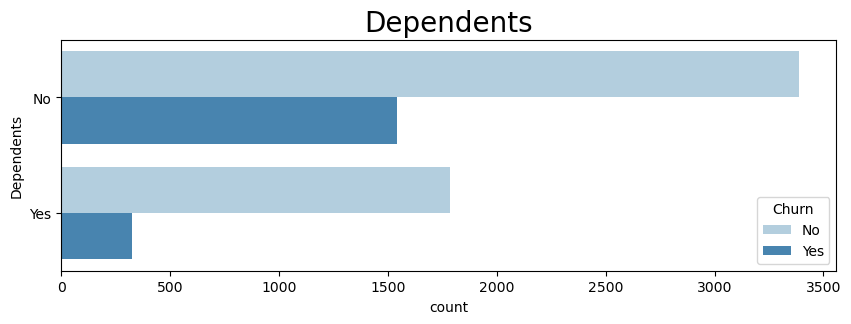

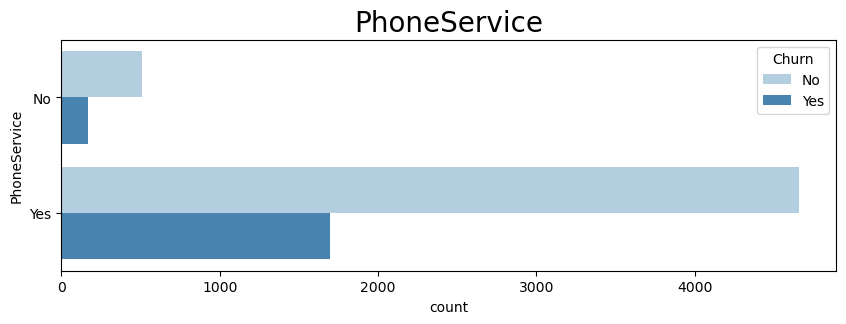

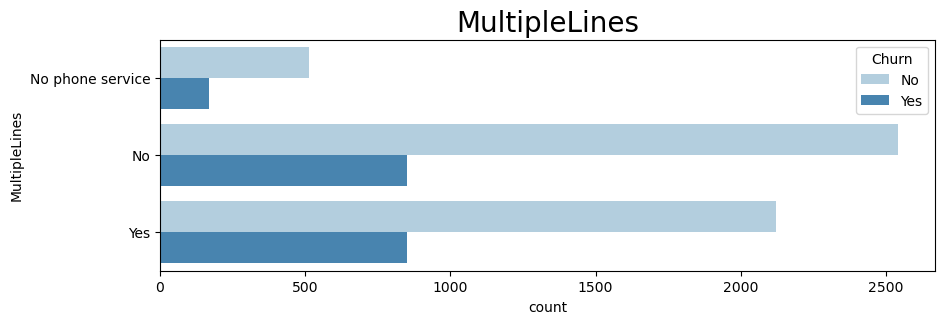

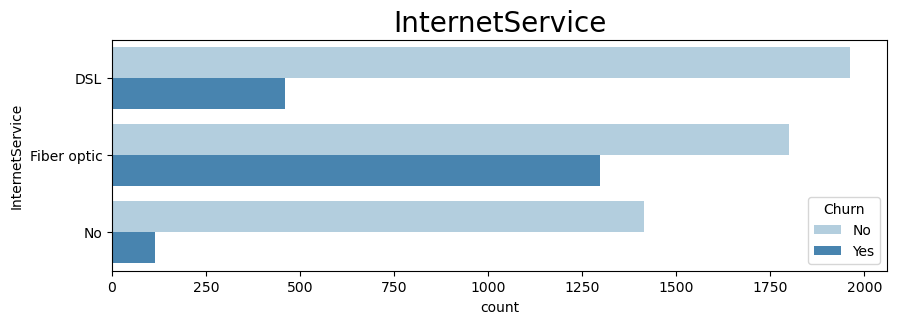

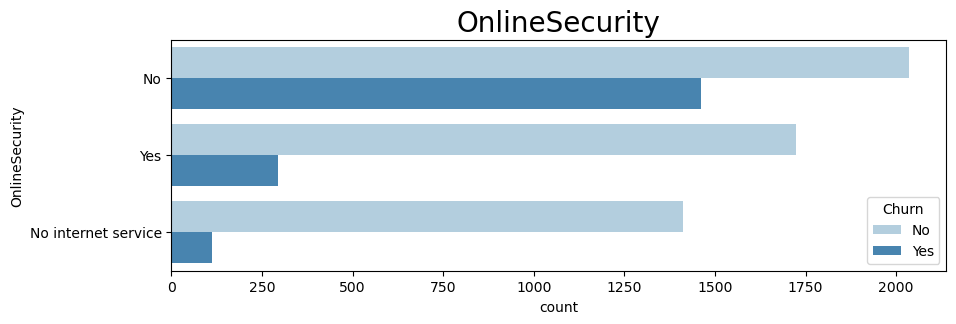

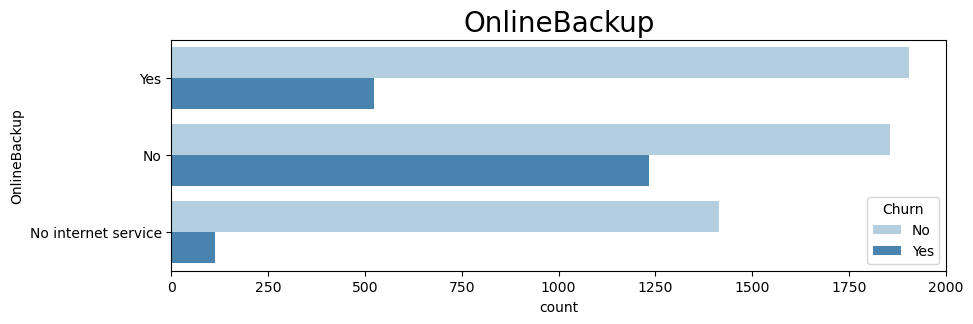

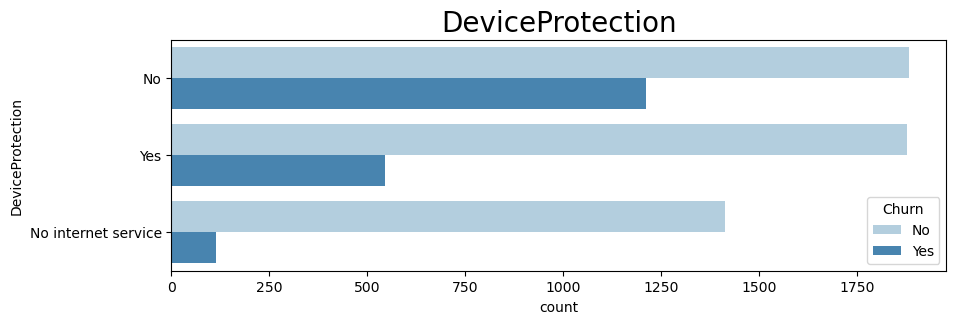

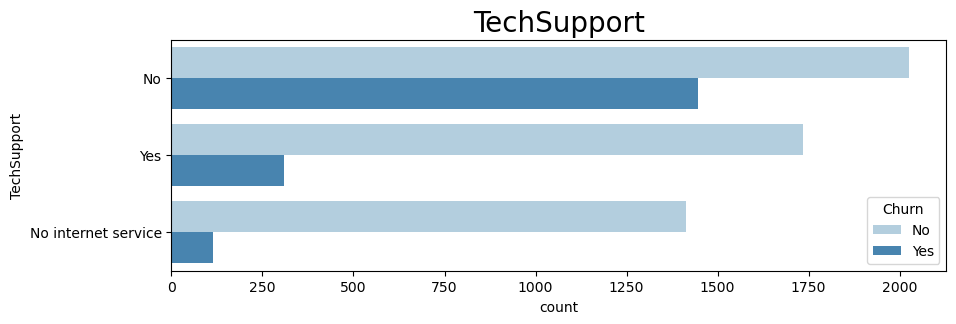

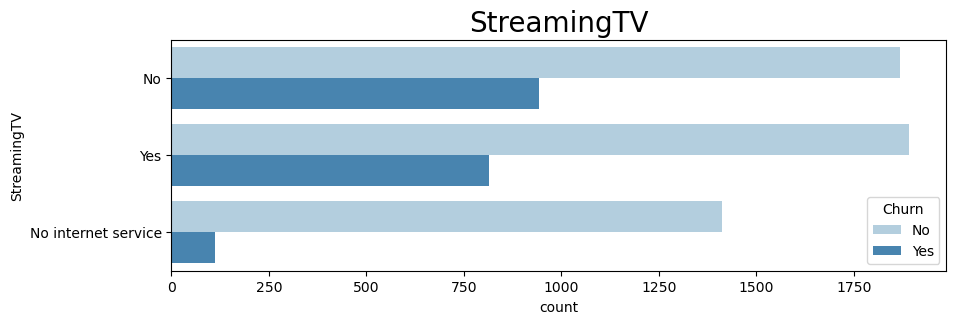

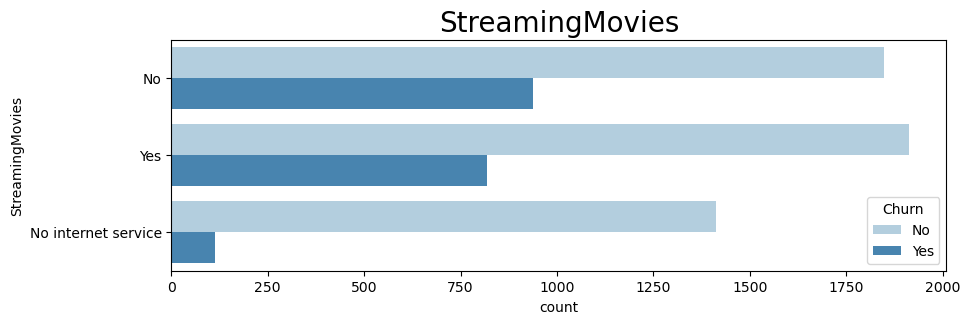

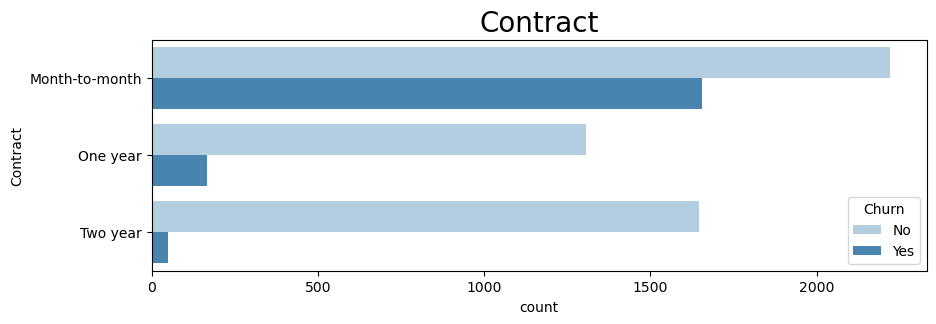

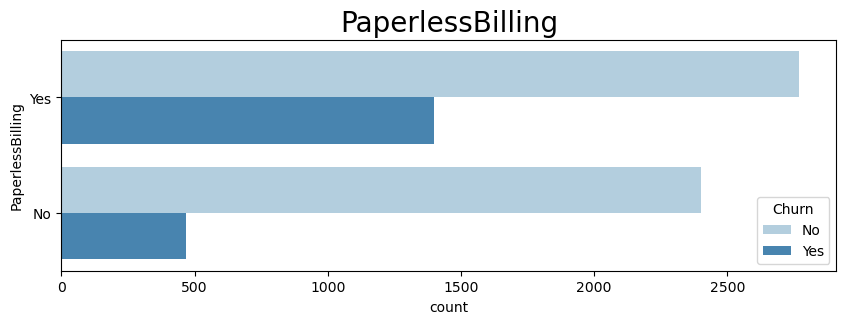

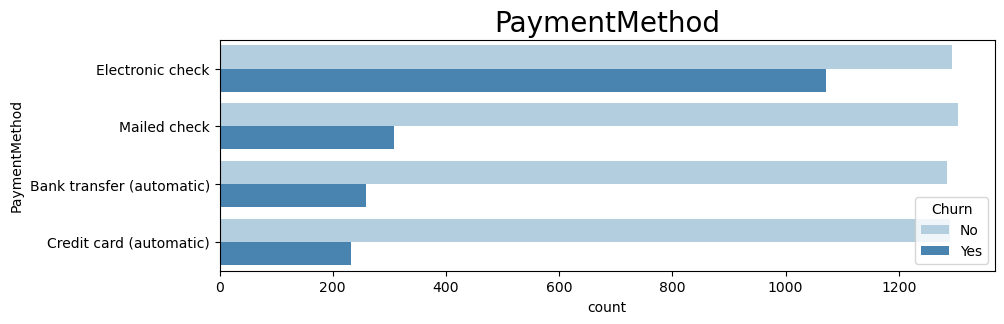

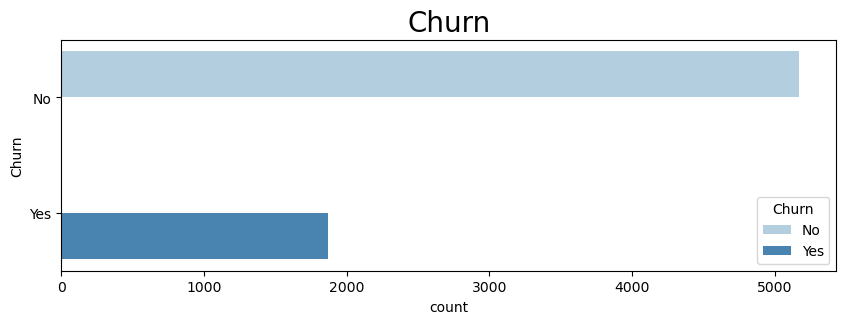

In [74]:
for v in categorical:
    plt.figure(figsize=(10,3))
    sns.countplot(y=v, hue='Churn', data=telco_raw, palette='Blues')
    plt.title(v, size=20)
    plt.show()

**Observation:**

Most Churners tend to have the following characteristics:

> Not a `SeniorCitizen`.

> Not a `Partner`

> Not `Dependents`

> Using a `PhoneService`

> With an `InternetService` with Fiber optic

> Not having an `OnlineSecurity`

> No `OnlineBackup`.

> No `DeviceProtection`.

> No `TechSupport`.

> `Contract`: Month to Month

> Having a `PaperlessBilling`.

> `PaymentMethod`: Electronic check.



This insights are not surprising, however, it is important to take them in consideration.

<a id="4"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

## Getting list of categorical and numeric column names

In [76]:
# Store customerID and Churn column names
custid = ['customerID']
target = ['Churn']

# Remove target from the list of categorical variables
categorical.remove(target[0])
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [77]:
# Store numerical column names
numerical = [x for x in telco_raw.columns if x not in custid + target + categorical]
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

## Encoding categorical variables


In [78]:
# Perform one-hot encoding to categorical variables 
telco_raw = pd.get_dummies(data = telco_raw, columns = categorical, drop_first=True)
telco_raw.head(1)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Scaling numerical variables

In [79]:
# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on numerical columns
scaled_numerical = scaler.fit_transform(telco_raw[numerical])

# Build a DataFrame from scaled_numerical
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)
scaled_numerical.head(1)

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194


In [80]:
# Drop numerical columns
telco_raw = telco_raw.drop(columns = numerical, axis = 1)
telco_raw.head(1)

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [81]:
# Merge categorical and numerical variables
telco = telco_raw.merge(scaled_numerical, how='left', left_index=True, right_index=True)
telco.head(1)

,customerID,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,-1.277445,-1.160323,-0.994194


## Null values

In [82]:
telco.isna().sum()

customerID                                0
Churn                                     0
gender_Male                               0
SeniorCitizen_1                           0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet service       0
StreamingMovies_Yes             

In [83]:
telco.dropna(inplace=True)

# Target variable

In [84]:
telco['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [85]:
telco['Churn'] = telco['Churn'].map({'Yes':1, 'No': 0})
telco['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [86]:
telco['Churn'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [87]:
X = telco.drop(['Churn', 'customerID'], axis=1)
Y = telco['Churn']

In [88]:
# Spliting data into training 75% and testing 25% 
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=seed)

# Ensure training dataset has only 75% of original X data
print("Training dataset:", round(train_X.shape[0] / X.shape[0] * 100, 2), "%")

# Ensure testing dataset has only 25% of original X data
print("Testing Dataset:", round(test_X.shape[0] / X.shape[0] * 100, 2), "%")

Training dataset: 75.0 %
Testing Dataset: 25.0 %


<a id="5"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CHURN PREDICTION MODEL</p>

In [89]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=seed)

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(random_state=seed)

# Neural Networks
models['Neural Networks'] = MLPClassifier(random_state=seed)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=seed)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=seed)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K Neighbors Classifier
models['K-Neighbor Classifier'] = KNeighborsClassifier()


accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(train_X, train_Y)
    
    # Make predictions
    y_pred = models[key].predict(test_X)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(y_pred, test_Y)
    precision[key] = precision_score(y_pred, test_Y)
    recall[key] = recall_score(y_pred, test_Y)
    
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model

,Accuracy,Precision,Recall
Logistic Regression,0.807167,0.538168,0.744063
Support Vector Machines,0.804892,0.536260,0.737533
Neural Networks,0.777588,0.490458,0.674541
Decision Trees,0.717292,0.498092,0.527273
Random Forest,0.782708,0.456107,0.711310
Naive Bayes,0.679750,0.877863,0.479666
K-Neighbor Classifier,0.740614,0.471374,0.579812


**Observation:**

> **Note that `Logistic Regression` is the best performing model, and `Decision Trees` the worst performing model in this case scenario.**

# Logistic Regression Approach

In [90]:
# LogisticRegression
logreg = LogisticRegression()

# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.8072


In [91]:
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
l1_metrics

array([[1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.5   , 0.    , 0.    , 0.    , 0.    ],
       [0.25  , 0.    , 0.    , 0.    , 0.    ],
       [0.1   , 0.    , 0.    , 0.    , 0.    ],
       [0.05  , 0.    , 0.    , 0.    , 0.    ],
       [0.025 , 0.    , 0.    , 0.    , 0.    ],
       [0.01  , 0.    , 0.    , 0.    , 0.    ],
       [0.005 , 0.    , 0.    , 0.    , 0.    ],
       [0.0025, 0.    , 0.    , 0.    , 0.    ]])

In [92]:
# Run a for loop over the range of C list length
for index in range(0, len(C)):
    # Initialize and fit Logistic Regression with the C candidate
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_X, train_Y)
    # Predict churn on the testing data
    pred_test_Y = logreg.predict(test_X)
    # Create non-zero count and recall score columns
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = accuracy_score(test_Y, pred_test_Y)
    l1_metrics[index,3] = precision_score(test_Y, pred_test_Y)
    l1_metrics[index,4] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall']
pd.DataFrame(l1_metrics, columns=col_names)

,C,Non-Zero Coeffs,Accuracy,Precision,Recall
0,1.0000,28.0,0.807167,0.742782,0.540076
1,0.5000,21.0,0.807167,0.741514,0.541985
2,0.2500,22.0,0.807736,0.744737,0.540076
3,0.1000,20.0,0.803754,0.738667,0.528626
4,0.0500,15.0,0.802617,0.747899,0.509542
5,0.0250,11.0,0.799204,0.752212,0.486641
6,0.0100,7.0,0.785552,0.759717,0.410305
7,0.0050,3.0,0.764505,0.780612,0.291985
8,0.0025,2.0,0.701934,0.000000,0.000000


In [93]:
# LogisticRegression
logreg = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=seed)

# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(pred_test_Y, test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.8066


In [94]:
# Classification report
print(classification_report(test_Y, pred_test_Y))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1234
           1       0.74      0.54      0.62       524

    accuracy                           0.81      1758
   macro avg       0.78      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758



## Confusion Matrix

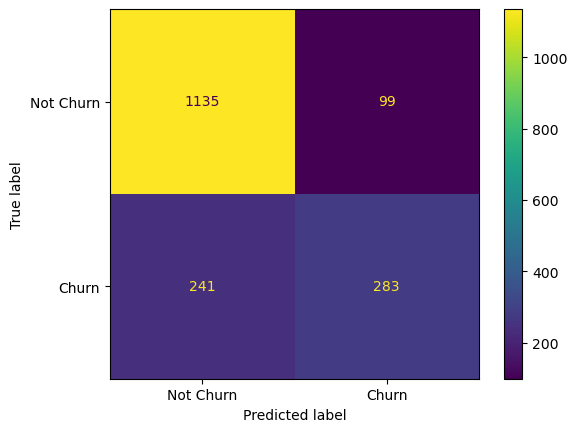

In [95]:
# Consufion Matrix
confusion_matrix(test_Y, pred_test_Y)
cm = confusion_matrix(test_Y, pred_test_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Churn', 'Churn'])
# Plot the confusion matrix
disp.plot()

In [96]:
# Extracting values of confusion matrix
tn, fp, fn, tp = cm.ravel()
s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)
print(s)


True Negatives: 1135
False Positives: 99
False Negatives: 241
True Positives: 283



In [108]:
def metrics(tn, fp, fn, tp):
    sen = tp / (tp + fn)
    print("Recall/Sensitivity: {0}".format(sen*100))
    spe = tn / (tn + fp)
    print("Specificity: {0}".format(spe*100))
    
def predictive_values(tn, fp, fn, tp):
    precision = tp / (tp + fp)
    print("Precision: {0}".format(precision*100))
    npv = tn / (tn + fn)
    print("Negative Predictive Value: {0}".format(npv*100))
    
predictive_values(tn, fp, fn, tp)
metrics(tn, fp, fn, tp)

Precision: 74.08376963350786
Negative Predictive Value: 82.48546511627907
Recall/Sensitivity: 54.007633587786266
Specificity: 91.9773095623987


**Observation:**

**Recall/Sensitivity:**  The proportion of getting a Churned customer and it gets correctly classified is 54%!

**Specificity:** The proportion of getting a Not Churned customer and it gets correctly classified is 91.97%!

## ROC Curve 

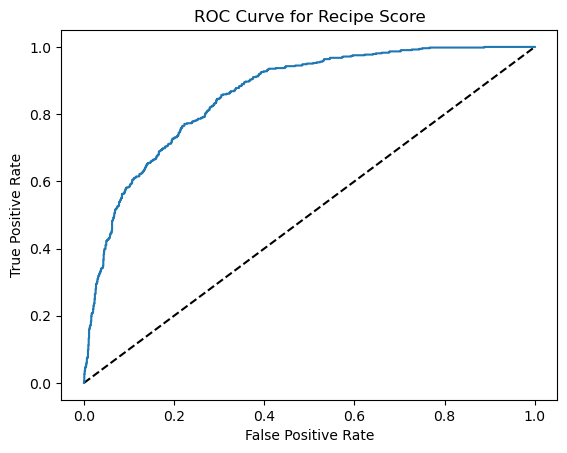

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve values: fpr, tpr, thresholds
y_pred_probs = logreg.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_Y, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Recipe Score')
plt.show()

In [102]:
auc = roc_auc_score(test_Y, y_pred_probs)
print("The ROC AUC Score is:", auc)

The ROC AUC Score is: 0.8587128991549853


## Transformed logistic regression coefficients 

In [104]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns = ['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
coefficients.sort_values(by=['Exp_Coefficient'])

,Feature,Coefficient,Exp_Coefficient
27,tenure,-1.345013,0.260536
22,Contract_Two year,-1.144411,0.318411
4,PhoneService_Yes,-0.708239,0.492511
21,Contract_One year,-0.679663,0.506788
10,OnlineSecurity_Yes,-0.417523,0.658677
16,TechSupport_Yes,-0.359262,0.698191
12,OnlineBackup_Yes,-0.260504,0.770663
24,PaymentMethod_Credit card (automatic),-0.192697,0.824732
5,MultipleLines_No phone service,-0.148430,0.862061
9,OnlineSecurity_No internet service,-0.129923,0.878163


**Observation:**

> The largest effects on the odds of churning are: `tenure`, `Contract_Two year`, etc.

> Values less than one decrease the odds, and values more than one increase the odds.

<a id="6"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONS</p>

In conclusion, the data was cleaned handling duplicated values. Furthermore, the data was preproccesed using encoding for categorical variables, and finally scaling features. In summary, found that the best performing model was a Losgistic Regression for Classification approach which has achieved:

1. A 80.66% accuracy with hyperparameter tuning.
2. The largest effects on the odds of churning are: `tenure`, `Contract_Two year`.
3. Evaluating the ROC Curve with a Sensitivity score of 54% and Specificity score of 91.97%.
4. A ROC AUC Score of 0.8587 which means that the model is more than 60% better than a model randomly guessing. 

<a id="7"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">RECOMMENDATIONS</p>

1. Defining the business case for further tuning of the model, giving priority for negative predictive values or positive predictive values.

2. The model performs very well predicting not churners, we can use this on a specific business case context. For example: Keep customers and Acquiring more customer.